# Temas Tratados en el Trabajo Práctico 4

* Representación del Conocimiento y Razonamiento Lógico.

* Estrategias de resolución de hipótesis: Encadenamiento hacia Adelante, Encadenamiento hacia Atrás y Resolución por Contradicción.

* Representación basada en circuitos.

## Ejercicios Teóricos

1. ¿Qué es una inferencia?

Es el proceso de derivar nuevas sentencias verdaderas a partir de una base de conocimientos usando reglas de deducción válidas

2. ¿Cómo se verifica que un modelo se infiere de la base de conocimientos?

Para verificar si algo se infiera de la base de conocimientos (BK) hay dos formas:

Por significado (semántico):
Consiste en mirar todos los casos posibles en los que la BK es verdadera.
Si en todos esos casos también se cumple la conclusión que queremos, entonces podemos decir que efectivamente se infiere.
(Ejemplo: con una tabla de verdad, revisás que cada vez que la BK es cierta, también lo es la conclusión).

Por reglas de deducción (sintáctico):
Consiste en aplicar paso a paso las reglas de la BK hasta ver si logramos llegar a la conclusión.
Si a partir de las reglas y hechos de la BK podemos derivar la conclusión, significa que se infiere.
(Ejemplo: usar encadenamiento hacia adelante o hacia atrás hasta alcanzar la hipótesis).

3. Observe la siguiente base de conocimiento:

$R1: b ∧ c → a$

$R2: d ∧ e → b$

$R3: g ∧ e → b$

$R4: e → c$

$R5: d$

$R6: e$

$R7: a ∧ g → f$

        3.1 ¿Cómo se puede probar que $a = True$ a través del encadenamiento hacia adelante? Este método solamente usa reglas ya incorporadas a la base de conocimiento para inferir la hipótesis, ¿qué propiedad debe tener el algoritmo para asegurar que esta inferencia sea posible?

        3.2 ¿Cómo se puede probar que $a = True$ a través del encadenamiento hacia atrás? Este método asigna un valor de verdad a la hipótesis y deriva las sentencias de la base de conocimiento, ¿qué propiedad debe tener el algoritmo para asegurar que esta derivación sea posible?

        3.3 Exprese la base de conocimiento en su Forma Normal Conjuntiva. A continuación, demuestre por contradicción que $a = True$.

3.1 Encadenamiento hacia adelante  

El encadenamiento hacia adelante arranca con los **hechos que ya conocemos** (en este caso: que `d` y `e` son verdaderos) y va aplicando las reglas como si fueran recetas.

1. Como `d` y `e` son verdaderos, la regla **R2** nos dice que entonces `b` también lo es.  
2. Como `e` es verdadero, la regla **R4** nos dice que entonces `c` también lo es.  
3. Ahora, como ya tenemos `b` y `c`, la regla **R1** nos dice que `a` es verdadero.  


3.2 Encadenamiento hacia atrás  

El encadenamiento hacia atrás parte de lo que **queremos probar** (en este caso: `a`) e intenta justificarlo.  

1. Para que `a` sea verdadero, la regla **R1** nos dice que necesitamos que `b` y `c` lo sean.  
   - Para `b`: la regla **R2** dice que se cumple si tenemos `d` y `e`. Y ya sabemos que ambos son hechos.  
   - Para `c`: la regla **R4** dice que se cumple si tenemos `e`. Y ya sabemos que `e` es hecho.  
2. Como tanto `b` como `c` se cumplen, entonces `a` también se cumple.  


3.3 Demostración por contradicción  

La idea es probar que `a` es verdadero **suponiendo lo contrario** y viendo si eso lleva a una contradicción.  

1. Supongamos que `a` es falso.  
2. A partir de los hechos `d` y `e`, la regla **R2** nos dice que `b` es verdadero.  
3. Con `e`, la regla **R4** nos dice que `c` es verdadero.  
4. Como ahora tenemos `b` y `c`, la regla **R1** nos dice que `a` debe ser verdadero.  
5. Pero eso contradice nuestra suposición de que `a` era falso.  
 


4. Diseñe con lógica proposicional basada en circuitos las proposiciones *OrientadoDerecha* y *Agente ubicado en la casilla [1,2]* para el mundo de wumpus de 4x4. Dibuje el circuito correspondiente.

Logica:
OrientadoDerecha = (¬O1) ∧ O0
Agente_1_2 = (¬X1 ∧ ¬X0) ∧ (¬Y1 ∧ Y0)

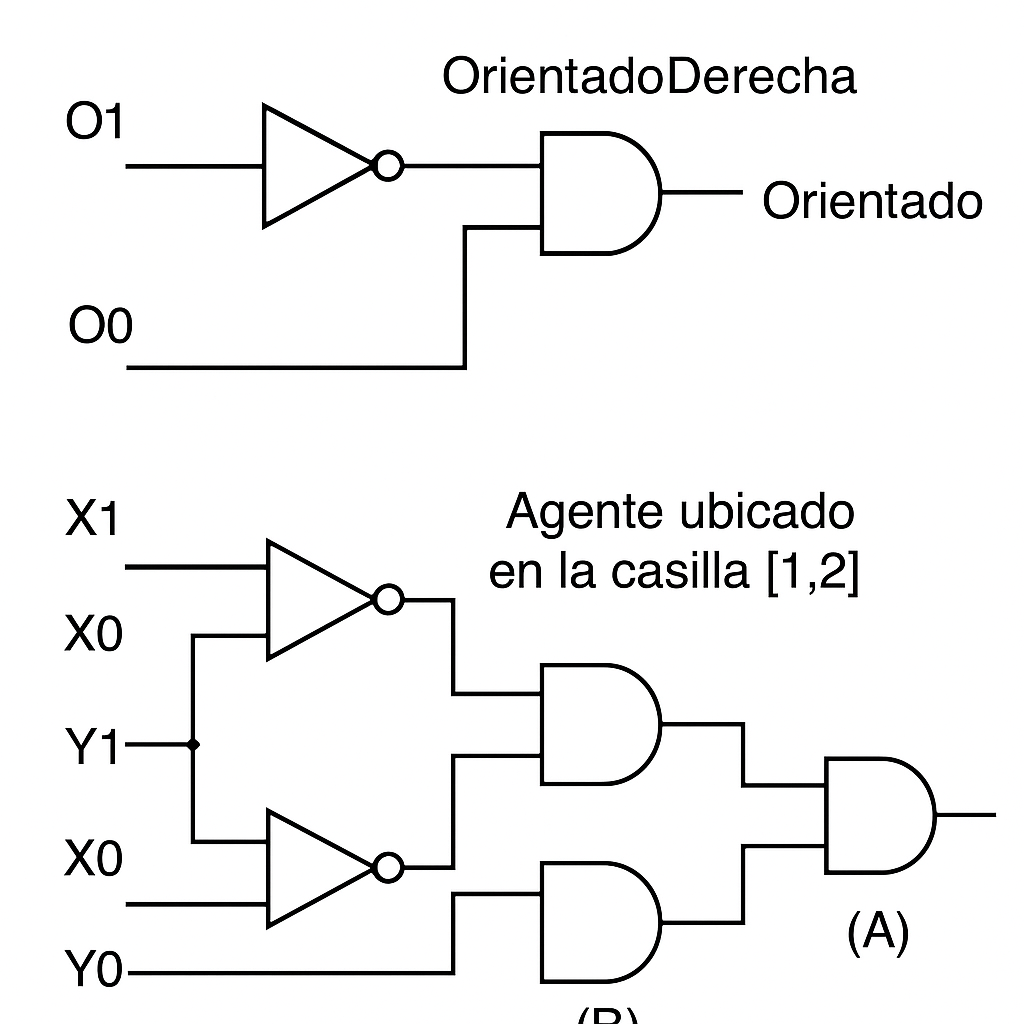


5. El nonograma es un juego en el cual se posee un tablero en blanco y cada fila y columna presenta información sobre la longitud de un bloque en dicha fila/columna. Además, la leyenda puede indicar más de un número, indicando esto que existen varios bloques de las longitudes mostradas por la leyenda y en el mismo orden, separados por al menos un espacio vacío.

Resuelva el nonograma de la imagen de abajo escribiendo en primer lugar cada regla que puede incorporarse a la base de conocimientos inicial e incorporando cada inferencia que realice.

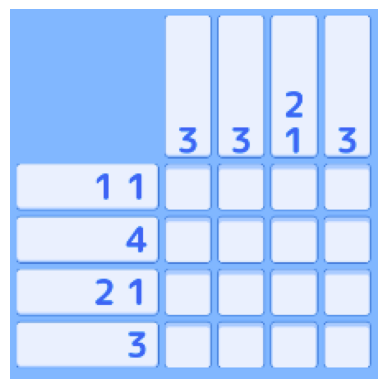

In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1SKiXvrI_TX-U4sbw60TYSRmaNYyFixmI"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

Denoto celdas por (fila, columna) y usaré ■ = llena y · = vacía.
Pistas por fila: F1=\[1,1], F2=\[4], F3=\[2,1], F4=\[3].
Pistas por columna: C1=\[3], C2=\[3], C3=\[2,1], C4=\[3].
  Reglas básicas que incorporo:
1. En una fila/columna con pista “n” y longitud 4:
   * \[4] ⇒ las 4 celdas son ■.
   * \[3] ⇒ hay exactamente 3 ■ contiguas.
   * \[1,1] ⇒ dos ■ separadas por al menos una ·.
   * \[2,1] ⇒ un bloque de 2 ■, luego (al menos) una ·, luego una ■.
2. Toda inferencia debe respetar simultáneamente filas y columnas.
   Inferencias:
A. F2=\[4] ⇒ (2,1)(2,2)(2,3)(2,4) = ■ ■ ■ ■.
(Esto “ancla” una ■ en cada columna.)
B. C3=\[2,1] con (2,3)= ■:
* El bloque de 2 solo puede ser (1,3)-(2,3); si fuera (2,3)-(3,3) no queda espacio para la · obligatoria antes del “1”.
  ⇒ (1,3)= ■, (3,3)=· y el “1” restante cae en (4,3)=■.
C. F1=\[1,1] y ya tenemos (1,3)= ■:
* La otra ■ no puede ser adyacente (ni en c2 ni en c4).
  ⇒ (1,1)=■, (1,2)=·, (1,4)=·.
D. C1=\[3] y ya (1,1)= ■, (2,1)= ■:
* Para formar 3 contiguas en una columna de 4, debe ser (1,1)(2,1)(3,1)=■ ■ ■ ⇒ (3,1)= ■ y (4,1)=·.
E. C2=\[3] con (1,2)=· y (2,2)= ■:
* Única posibilidad contigua: (2,2)(3,2)(4,2)= ■ ■ ■ ⇒ (3,2)= ■, (4,2)= ■.
F. C4=\[3] con (1,4)=· y (2,4)= ■:
* Única posibilidad contigua: (2,4)(3,4)(4,4)= ■ ■ ■ ⇒ (3,4)= ■, (4,4)= ■.
G. Comprobaciones por filas restantes:
* F3 ahora es (3,1)(3,2)= ■ ■, (3,3)=·, (3,4)= ■ ⇒ cumple \[2,1].
* F4 es (4,1)=·, (4,2)(4,3)(4,4)= ■ ■ ■ ⇒ cumple \[3].
  Solución (de arriba hacia abajo):

F1: ■  ·  ■  ·
F2: ■  ■  ■  ■
F3: ■  ■  ·  ■
F4: · ■  ■  ■

(Coordenadas llenas: (1,1)(1,3)(2,1)(2,2)(2,3)(2,4)(3,1)(3,2)(3,4)(4,2)(4,3)(4,4).)


## Ejercicios de Implementación

6. Implementar un motor de inferencia con encadenamiento hacia adelante. Pruébelo con las proposiciones del ejercicio 3.

7. Implementar un motor de inferencia con encadenamiento hacia atrás. Pruébelo con las proposiciones del ejercicio 3.

8. Implementar un motor de inferencia por contradicción que detecte si el conjunto de proposiciones del ejercicio 3 es inconsistente.

# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)